In [1]:
api_key = ""
channel_id = ""

In [2]:
from googleapiclient.discovery import build
youtube = build("youtube", "v3", developerKey=api_key)

In [3]:
def get_channel_videos(channel_id):
    res = youtube.channels().list(id=channel_id,
                                 part="contentDetails").execute()
    playlist_id = res["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]
    
    videos = []
    next_page_token = None
    
    while 1:
        res = youtube.playlistItems().list(playlistId=playlist_id,
                                          part="snippet",
                                          maxResults=50,
                                          pageToken=next_page_token).execute()
        videos += res["items"]
        next_page_token = res.get("nextPageToken")
        
        if next_page_token is None:
            break
    
    return videos

In [4]:
videos = get_channel_videos(channel_id)

In [5]:
res = youtube.videos().list(id=videos[0]["snippet"]["resourceId"]["videoId"],
                           part="statistics").execute()

In [6]:
video_ids = list(map(lambda x:x['snippet']['resourceId']['videoId'], videos))

In [7]:
def get_videos_stats(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):
        res = youtube.videos().list(id=','.join(video_ids[i:i+50]),
                                   part='statistics').execute()
        stats += res['items']
    return stats

In [8]:
stats = get_videos_stats(video_ids)

In [9]:
publishedAt = []
title = []
viewCount = []
for i in range(len(videos)):
    publishedAt.append(videos[i]['snippet']['publishedAt'])
    title.append(videos[i]['snippet']['title'])
    viewCount.append(stats[i]['statistics']['viewCount'])

In [10]:
dict = {}
dict["publishedAt"] = publishedAt
dict["title"] = title
dict["viewCount"] = viewCount

In [11]:
import pandas as pd
df = pd.DataFrame.from_dict(dict)

In [13]:
import pandas as pd
df = pd.DataFrame.from_dict(dict)

In [14]:
df.head()

,publishedAt,title,viewCount
0,2021-04-06T09:00:04Z,에이치엘비 잔인한 13연속 하락추세 차트!!,1080
1,2021-04-06T03:15:51Z,에이치엘비 돌려받을 가능성 UP!! | 금감원 분쟁조정위원회는 옵티머스 100% 전...,3290
2,2021-04-06T03:00:07Z,에이치엘비 공매도잔고 또 백만주 증가!! 무상증자후 공매도잔고는 2배!!,5024
3,2021-04-05T21:00:23Z,에이치엘비 10년전 진양곤회장의 놀라운 매수 평단가!!,8210
4,2021-04-05T09:00:06Z,에이치엘비와 달리 삼성바이오로직스는 증선위로 거래정지 된 이유!!,6841


In [69]:
foreign_firm = []
hlb = []

In [70]:
for i in dict['title']:
    if '임클론' in i.lower():
        foreign_firm.append(i)
    elif 'imclone'in i.lower():
        foreign_firm.append(i)
    elif '아베오'in i.lower():
        foreign_firm.append(i)
    elif 'aveo'in i.lower():
        foreign_firm.append(i)
    elif '티보자닙'in i.lower():
        foreign_firm.append(i)
    elif 'tivozanib' in i.lower():
        foreign_firm.append(i)
    elif 'erbitux' in i.lower():
        foreign_firm.append(i)

In [71]:
foreign_firm

['에이치엘비 참고사례: "축경축" AVEO 티보자닙 FDA승인 후 초급등!! OS가 아닌 PFS!!',
 '에이치엘비 참고사례: "축경축" AVEO 티보자닙 FDA승인 후 초급등! 무상증자 받을 것인가? 피할 것인가? 나는 어떻게 할 것인가? 묻고 더블로 가? 빅토리세력 종토방 일시점령',
 '에이치엘비 주가 참고 사례 | 티보자닙은 어떤 식으로 투자자들을 misleading하였는가?',
 '에이치엘비 리보세라닙과 아베오 티보자닙의 공통점과 차이점',
 '에이치엘비 참고 사례 | 신약개발 회사 진짜인지 사기인지 헷갈리는 이유? 아베오는 어떤 FDA 권고를 숨기고 자금조달하였는가?',
 '에이치엘비와 비슷하지만 다른 점. 아베오 CFO의 유죄판결(misleading investors)',
 '에이치엘비 참고사례 | FDA가 재도전한 티보자닙의 NDA제출 받아줬다! (OS 통계적 유의성 미확보, PFS는 뛰어남) 신약승인 나온다면?!',
 '에이치엘비 참고사례 | 신약승인 사례에서 티보자닙(Tivozanib)은 FDA승인거절 당했지만 유럽에선 승인받았다!',
 '에이치엘비 | 임클론... FDA로부터 제출거절(RTF)을 받고나서 그 뒤의 이야기',
 '에이치엘비 | [임클론 최종결말] ASCO에서 발표되고 누구도 의심하지 않았던 9923임상시험은 도대체 어디서 잘못되었던 걸까?',
 '에이치엘비 | FDA가 추가임상을 요구했던 임클론이 잘못된 진짜 이유(반전)',
 '에이치엘비와 ImClone의 차이점을 알면 잘못될 경우에 신호를 포착할 수 있습니다. 가장 먼저 탈출하는 자를 눈여겨 봐라!',
 '에이치엘비 | 과거에 ImClone이 잘못되어가고 있다는 신호(FDA로부터 RTF를 받은 사실)를 미리 알 수 있는 방법은 없었을까?',
 "에이치엘비 아필리아 | FDA는 승인을 내주기 위해 추가 임상을 요구하기도 합니다. (ex. ImClone's Erbitux)"]

In [72]:
foreign_firm_publishedAt = []

In [73]:
for i, title in enumerate(dict['title']):
    if '임클론' in title.lower():
        foreign_firm_publishedAt.append(dict['publishedAt'][i])
    elif 'imclone'in title.lower():
        foreign_firm_publishedAt.append(dict['publishedAt'][i])
    elif '아베오'in title.lower():
        foreign_firm_publishedAt.append(dict['publishedAt'][i])
    elif 'aveo'in title.lower():
        foreign_firm_publishedAt.append(dict['publishedAt'][i])
    elif '티보자닙'in title.lower():
        foreign_firm_publishedAt.append(dict['publishedAt'][i])
    elif 'tivozanib' in title.lower():
        foreign_firm_publishedAt.append(dict['publishedAt'][i])
    elif 'erbitux' in title.lower():
        foreign_firm_publishedAt.append(dict['publishedAt'][i])

In [74]:
min(foreign_firm_publishedAt)

'2020-12-06T12:42:02Z'

In [78]:
for i, time in enumerate(dict['publishedAt']):
    if min(foreign_firm_publishedAt) in time:
        print(i+1)

404


In [76]:
dict['title'][403]

"에이치엘비 아필리아 | FDA는 승인을 내주기 위해 추가 임상을 요구하기도 합니다. (ex. ImClone's Erbitux)"

In [77]:
dict['title'][404]

'에이치엘비 아필리아 예상 시판 승인 기간이 관계대명사(, which) 해석 하나에 달라집니다.'

In [116]:
viewcount_foreign = []
viewcount_hlb = []

In [117]:
for i, title in enumerate(dict['title'][:405]):
    if '임클론' in title.lower():
        viewcount_foreign.append(int(dict['viewCount'][i]))
    elif 'imclone'in title.lower():
        viewcount_foreign.append(int(dict['viewCount'][i]))
    elif '아베오'in title.lower():
        viewcount_foreign.append(int(dict['viewCount'][i]))
    elif 'aveo'in title.lower():
        viewcount_foreign.append(int(dict['viewCount'][i]))
    elif '티보자닙'in title.lower():
        viewcount_foreign.append(int(dict['viewCount'][i]))
    elif 'tivozanib' in title.lower():
        viewcount_foreign.append(int(dict['viewCount'][i]))
    elif 'erbitux' in title.lower():
        viewcount_foreign.append(int(dict['viewCount'][i]))

In [118]:
for i, title in enumerate(dict['title'][:405]):
    if '에이치엘비' in title:
        viewcount_hlb.append(int(dict['viewCount'][i]))

In [119]:
len(viewcount_foreign)

14

In [120]:
len(viewcount_hlb)

375

In [121]:
mean_viewcount_foreign = sum(viewcount_foreign)/len(viewcount_foreign)
mean_viewcount_hlb = sum(viewcount_hlb)/len(viewcount_hlb)

In [122]:
mean_viewcount_foreign

8706.92857142857

In [123]:
mean_viewcount_hlb

9798.682666666668

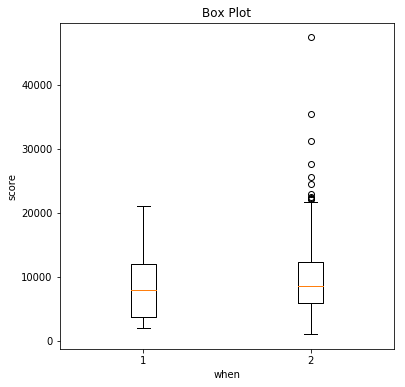

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 6))
plt.grid()
plt.boxplot([viewcount_foreign, viewcount_hlb])
plt.xlabel('when')
plt.ylabel('score')
plt.title('Box Plot')
plt.grid()
plt.show()

In [126]:
from scipy.stats import ttest_ind
ttest_ind(viewcount_foreign, viewcount_hlb)

Ttest_indResult(statistic=-0.7309546298510192, pvalue=0.4652491766939407)

# Results
  에이치엘비와 해외기업을 다룬 영상의 median viewcount는 8706회이고 에이치엘비를 다룬 영상의 median viewcount는 9798회로 통계적 유의미성을 달성하지 못했다.(p-value=0.465) 그러므로 에이치엘비와 함께 해외기업을 다룬다고 영상 조회수가 떨어지지 않는다.

# Conclusion
  컨텐츠의 확장 측면에서 에이치엘비와 함께 해외기업을 다룬다.